In [4]:
import os
from pathlib import Path
import rasterio
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Print current working directory
print("Current working directory:")
print(os.getcwd())

# If notebook is inside /notebooks, move one level up
if Path(os.getcwd()).name == "notebooks":
    os.chdir("..")

print("\nUpdated working directory:")
print(os.getcwd())


Current working directory:
c:\Users\zahee\Videos\soil-carbon-proxy-mrv\notebooks

Updated working directory:
c:\Users\zahee\Videos\soil-carbon-proxy-mrv


In [6]:
def raster_stats_and_hist(path, title, bins=50):
    path = Path(path)

    if not path.exists():
        raise FileNotFoundError(f"File not found:\n{path.resolve()}")

    with rasterio.open(path) as src:
        data = src.read(1).astype(float)
        nodata = src.nodata

    if nodata is not None:
        data = data[data != nodata]

    data = data[~np.isnan(data)]

    print(f"\n--- {title} ---")
    print(f"File: {path.name}")
    print(f"Min:  {np.min(data):.4f}")
    print(f"Max:  {np.max(data):.4f}")
    print(f"Mean: {np.mean(data):.4f}")
    print(f"Std:  {np.std(data):.4f}")
    print(f"Pixels: {data.size}")

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=bins)
    plt.title(f"Histogram – {title}")
    plt.xlabel(title)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()


In [7]:
print("NDVI files:", list(Path("data/raw/ndvi").glob("*")))
print("BSI files:", list(Path("data/raw/bsi").glob("*")))
print("SAVI files:", list(Path("data/raw/savi").glob("*")))
print("WorldCover files:", list(Path("data/raw/worldcover").glob("*")))
print("ERA5-Land files:", list(Path("data/raw/era5_land").glob("*")))


NDVI files: [WindowsPath('data/raw/ndvi/NDVI_Summer_JJA_2024_merged.tif')]
BSI files: [WindowsPath('data/raw/bsi/BSI_Summer_JJA_2024_merged.tif')]
SAVI files: [WindowsPath('data/raw/savi/SAVI_Summer_JJA_2024_merged.tif')]
WorldCover files: [WindowsPath('data/raw/worldcover/WorldCover_CroplandMask_Brandenburg.tif')]
ERA5-Land files: [WindowsPath('data/raw/era5_land/ERA5_Land_Summer_SoilMoisture_Temperature_2024.tif')]



--- NDVI (Summer JJA 2024) ---
File: NDVI_Summer_JJA_2024_merged.tif
Min:  -1.0000
Max:  1.0000
Mean: 0.6585
Std:  0.2203
Pixels: 449432579


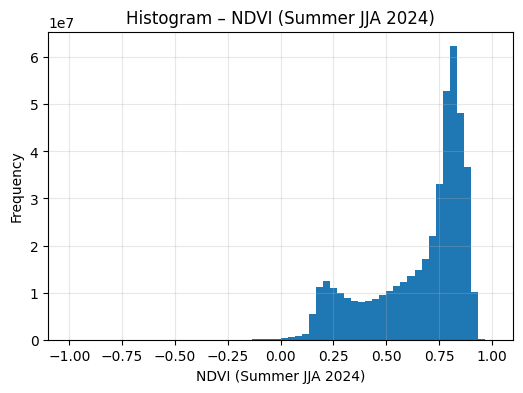

In [8]:
ndvi_path = Path("data/raw/ndvi/NDVI_Summer_JJA_2024_merged.tif")

raster_stats_and_hist(
    ndvi_path,
    title="NDVI (Summer JJA 2024)",
    bins=60
)



--- Bare Soil Index (Summer JJA 2024) ---
File: BSI_Summer_JJA_2024_merged.tif
Min:  -0.8543
Max:  1.0000
Mean: -0.1373
Std:  0.1956
Pixels: 449432579


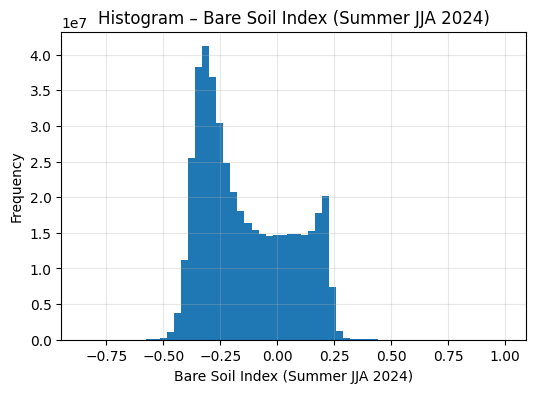

In [9]:
bsi_path = Path("data/raw/bsi/BSI_Summer_JJA_2024_merged.tif")

raster_stats_and_hist(
    bsi_path,
    title="Bare Soil Index (Summer JJA 2024)",
    bins=60
)



--- SAVI (Summer JJA 2024) ---
File: SAVI_Summer_JJA_2024_merged.tif
Min:  -1.4977
Max:  1.4990
Mean: 0.9879
Std:  0.3301
Pixels: 478247659


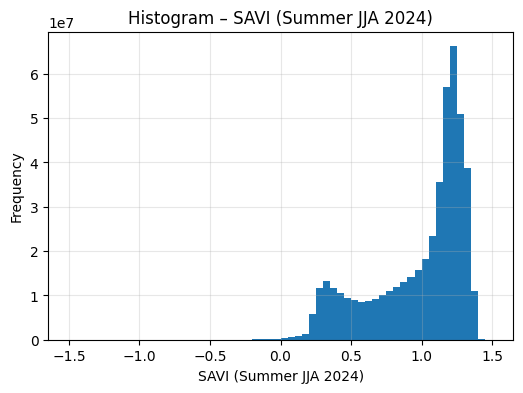

In [10]:
savi_path = Path("data/raw/savi/SAVI_Summer_JJA_2024_merged.tif")

raster_stats_and_hist(
    savi_path,
    title="SAVI (Summer JJA 2024)",
    bins=60
)



--- ERA5 Soil Moisture (Summer JJA 2024) ---
Min: 0.1735558993574502
Max: 0.5824361193007317
Mean: 0.31162738178575705


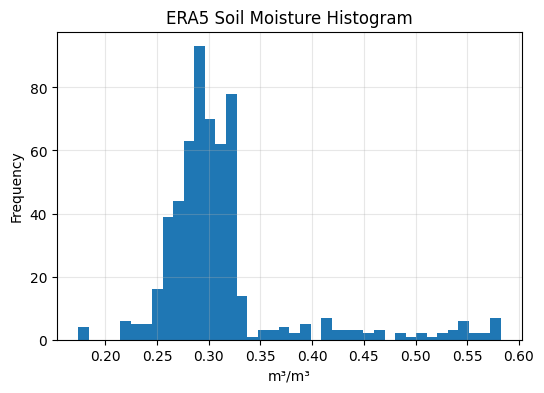


--- ERA5 Temperature (Summer JJA 2024) ---
Min: 18.44137493631115
Max: 20.783473448822463
Mean: 19.903784633223708


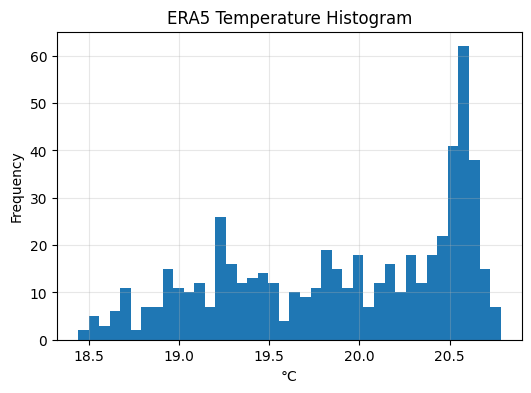

In [11]:
era5_path = Path("data/raw/era5_land/ERA5_Land_Summer_SoilMoisture_Temperature_2024.tif")

if not era5_path.exists():
    raise FileNotFoundError(era5_path.resolve())

with rasterio.open(era5_path) as src:
    soil_moisture = src.read(1)
    temperature = src.read(2)

soil_moisture = soil_moisture[~np.isnan(soil_moisture)]
temperature = temperature[~np.isnan(temperature)]

print("\n--- ERA5 Soil Moisture (Summer JJA 2024) ---")
print("Min:", soil_moisture.min())
print("Max:", soil_moisture.max())
print("Mean:", soil_moisture.mean())

plt.figure(figsize=(6,4))
plt.hist(soil_moisture, bins=40)
plt.title("ERA5 Soil Moisture Histogram")
plt.xlabel("m³/m³")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

print("\n--- ERA5 Temperature (Summer JJA 2024) ---")
print("Min:", temperature.min())
print("Max:", temperature.max())
print("Mean:", temperature.mean())

plt.figure(figsize=(6,4))
plt.hist(temperature, bins=40)
plt.title("ERA5 Temperature Histogram")
plt.xlabel("°C")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


In [12]:
wc_path = Path("data/raw/worldcover/WorldCover_CroplandMask_Brandenburg.tif")

with rasterio.open(wc_path) as src:
    wc = src.read(1)

values, counts = np.unique(wc, return_counts=True)
print(dict(zip(values, counts)))


{np.uint8(0): np.int64(693364024), np.uint8(1): np.int64(146297876)}
